In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import scipy.io
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### load data

In [2]:
mat = scipy.io.loadmat('../../datasets/mnist.mat')

In [3]:
X_train = mat['Xtr']
y_train = mat['ytr']
X_test = mat['Xtst']
y_test = mat['ytst']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 1), (10000, 784), (10000, 1))

### apply PCA to reduce dimension

In [4]:
pca = PCA(n_components=187).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape, X_test_pca.shape

((60000, 187), (10000, 187))

### nearest centroid classification

In [5]:
clf = NearestCentroid()
clf.fit(X_train_pca, y_train.ravel())

y_pred = clf.predict(X_test_pca)

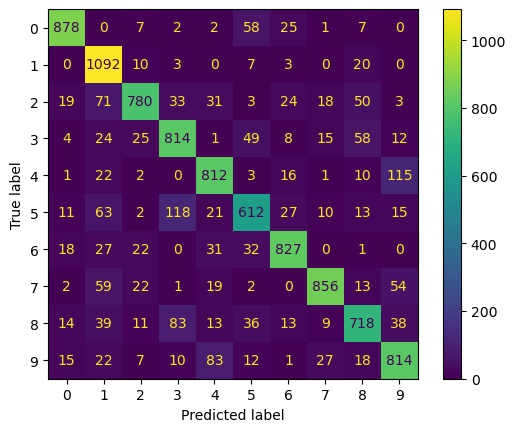

In [6]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()

In [7]:
accuracy_score(y_test,y_pred)

0.8203

### k nearest neighbor classification

In [ ]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [9]:
clf = KNeighborsClassifier(n_neighbors=3, weights='uniform', n_jobs=-1)

clf.fit(X_train_pca, y_train.ravel())

y_pred = clf.predict(X_test_pca)

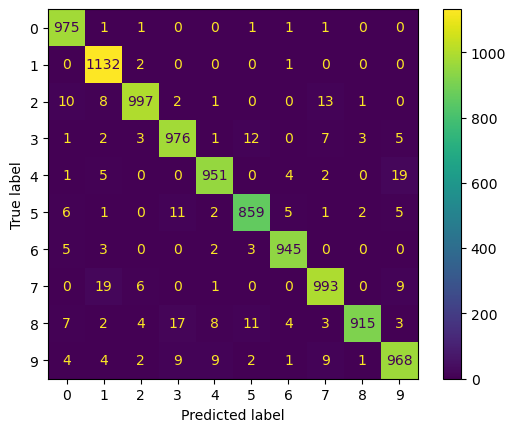

In [10]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()

In [11]:
accuracy_score(y_test,y_pred)

0.9711

In [12]:
errors = []

for k in range(1,11):

    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', n_jobs=-1)
    clf.fit(X_train_pca, y_train.ravel())

    y_pred = clf.predict(X_test_pca)
    a = accuracy_score(y_test,y_pred)
    
    print('k = ', k, ': error = ', 1-a)
    errors = np.append(errors, 1-a)

k =  1 : error =  0.03080000000000005
k =  2 : error =  0.03539999999999999
k =  3 : error =  0.028900000000000037
k =  4 : error =  0.030200000000000005
k =  5 : error =  0.029900000000000038
k =  6 : error =  0.03080000000000005
k =  7 : error =  0.029000000000000026
k =  8 : error =  0.03190000000000004
k =  9 : error =  0.031200000000000006
k =  10 : error =  0.03200000000000003


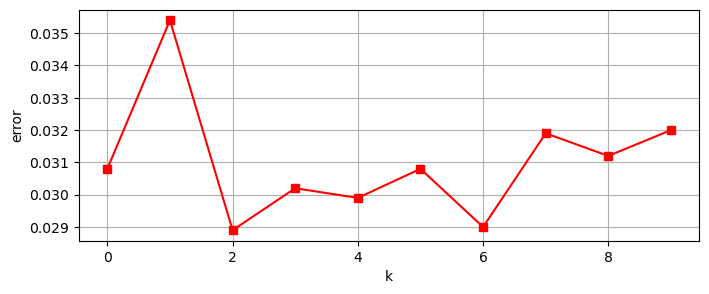

In [13]:
plt.figure(figsize=(8,3))
plt.plot(errors, 'r-s')
plt.xlabel('k');
plt.ylabel('error');
plt.grid('on')
plt.show()